In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


Reading the data

Creating Independent and Dependent Variables

In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/Desharnais.csv")
# dataset = pd.read_csv("Dataset/maxwell.arff.csv")
max_corr_features =  [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']


x=np.array(dataset[max_corr_features])

y=np.array(dataset['Effort'])

Scaling the data

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)
y=np.reshape(y,(81,1))
y=scaler.fit_transform(y)

 Splitting the dataset into training and testing set (80/20)

In [4]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state =67)

Stacking Model

In [5]:
 
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


estimators = [('kn', KNeighborsRegressor()),('svr', SVR()),('dt', DecisionTreeRegressor())]

level1 = LinearRegression()
model = StackingRegressor(estimators=estimators, final_estimator=level1, cv=5)

In [6]:

# Train the model 
model.fit(x_train, y_train.ravel())

StackingRegressor(cv=5,
                  estimators=[('kn', KNeighborsRegressor()), ('svr', SVR()),
                              ('dt', DecisionTreeRegressor())],
                  final_estimator=LinearRegression())

In [7]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

In [8]:
y_pred=np.reshape(y_pred,(17,1))
y_test=np.reshape(y_test,(17,1))

Finding the RMSE and MAPE

In [9]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [10]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [11]:
# RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)
smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


RMSE:
 0.13879364799201296

MAPE:
 112.64959151344365

SMAPE:
 57.05

 Adj R2 score:
 0.7375580963576227


In [12]:

y_pred=scaler.inverse_transform(y_pred)

In [13]:


y_test=scaler.inverse_transform(y_test)

In [14]:

y_test=np.reshape(y_test,(17,))
y_pred=np.reshape(y_pred,(17,))

In [15]:
dfr=pd.DataFrame({'Actual effort':y_test, 'Predicted effort':y_pred})

dfr.to_csv('dfr.csv', index=False)
 
print(dfr)

    Actual effort  Predicted effort
0          5152.0       6656.791279
1         14973.0       5208.631237
2          5180.0       8333.285128
3         11361.0       7868.492211
4          2149.0       3661.414787
5          4067.0       5156.684083
6          9051.0       7998.151598
7          3948.0       5331.989316
8           847.0       2553.695077
9          2723.0       1927.305739
10         3437.0       6639.806154
11          805.0       2285.984903
12         1617.0       3197.264600
13        13860.0       8778.281053
14         6699.0       8275.718002
15         4620.0       4432.767531
16         7854.0       5376.477751


In [16]:
    dfr.to_csv('StackingDesh.csv', index=True)
   
    dfr.to_excel("StackingDesh.xlsx")
    
    

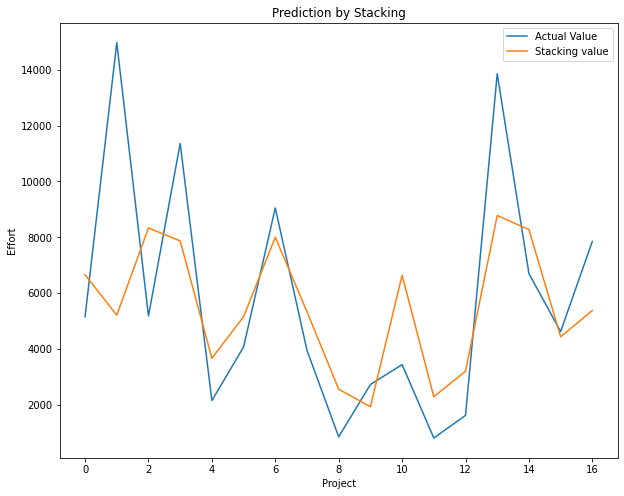

In [17]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Stacking value")
plt.title("Prediction by Stacking")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()